# Notes for Reader(s)
It was very frustrating to try to fork over github projects into https://github.com/compdyn because it is not a repository that I can fork to. So I had to fork projects to my own github account and then download (NOT CLONE) the folders in order for them to be added to https://github.com/compdyn. Otherwise there would be an issue with pushing the local file directory to [compdyn](https://github.com/compdyn).

Installed open-ai gym using pip install within the gym directory 'pip install -e .'

Note that one has to **restart kernel and clear outputs** to get rid of openai gym windows on my computer.

# Initializing Environments
## Creating new environments
Two weeks after the assignment, after failing to find online resources, I sat down with Matt to find that environments for openAI gym are just a specific class with 4 specific methods. All the other aspects, such as installing an environment and adding it to a registry were completely unnecessary.


In [ ]:
import gym
from gym import error, spaces, utils
from gym.utils import seeding

class FooEnv(gym.Env):
  metadata = {'render.modes': ['human']}

  def __init__(self):
    pass
  def step(self, action):
    pass
  def reset(self):
    pass
  def render(self, mode='human', close=False):
    pass

### Graphical Gridworld Environment Initialization
The gridline drawing code is adapted from [here](https://stackoverflow.com/questions/30482727/pyplot-setting-grid-line-spacing-for-plot). The removal of just the plotted line (so as to not require reploting the grid every time step is from [here]().

<IPython.core.display.Javascript object>


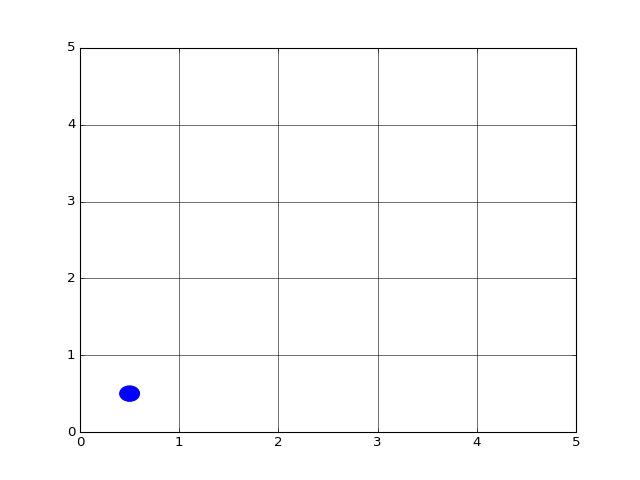

In [ ]:
%matplotlib notebook
import numpy as np
#import weakref
import matplotlib.pyplot as plt
import gym
from gym import error, spaces, utils
from gym.utils import seeding
import matplotlib.ticker as plticker

class FooEnv(gym.Env):
  metadata = {'render.modes': ['human']}

  def __init__(self):
    pass
  def step(self, action):
    pass
  def reset(self):
    pass
  def render(self, mode='human', close=False):
    pass
m = 100
n = 100
fig,ax=plt.subplots()

num_grids = 5
intervals = float(1/num_grids)# 5x5 grid, dimension of grid affects size
loc = plticker.MultipleLocator(base=intervals)
ax.xaxis.set_major_locator(loc)
ax.set_xlim(0, num_grids)
ax.yaxis.set_major_locator(loc)
ax.set_ylim(0, num_grids)

for i in range(0,100):
    ax.clear()
    ax.grid(which='major', axis='both', linestyle='-')
    circle2 = plt.Circle((0.5, 0.5), 0.1, color='blue')
    fig = plt.gcf()
    ax = fig.gca()
    ax.add_artist(circle2)
    fig.canvas.draw()
    

### Running Acrobot V1 Vanilla
Note that this is just an agent doing random actions. A fully fledged acrobot implementation (prior to programming a value function and policy) would generate a reward as instructed in the assignment.

In [ ]:
import gym
import gym.spaces
env = gym.make('Acrobot-v1')
env.reset()
for _ in range(1000):
    env.render()
    env.step(env.action_space.sample()) # take a random action

### Running Gridworld

## List of Environments Officially in OpenAI Gym

In [ ]:
from gym import envs
print (envs.registry.all())

# Progress in New Environment Implementations
## Gridworld
I have been able to create a pip install environment, following the instructions [here](https://github.com/openai/gym/tree/master/gym/envs), however I could not get it to run. I have attempted and failed to troubleshoot as proposed [here](https://github.com/openai/gym/issues/626). 

I have successfully installed but failed to implement [this gridworld for open-ai gym](https://github.com/xinleipan/gym-gridworld), which has an error addressed [here](https://github.com/openai/gym/issues/860) whose solution did not work for me, or escapes my intuition. 

As a test, I tried installing and running the ['recommended'](https://github.com/openai/gym/tree/master/gym/envs#how-to-create-new-environments-for-gym) environment [gym-soccer](https://github.comopenai/gym-soccer), and while the installation was successful (as was the case for the gridworld) I have not managed to run it.



This stems from disappointingly unhelpful sources saying ["It is quite simple"](https://www.quora.com/How-does-one-create-a-custom-environment-utilising-OpenAIs-universe-gym-libraries). There are no available video tutorials to fill in the gaps, to the best of my knowledge. Video tutorials are of the form of ["look at this staple problem, we will show you how to get a starting solution"](https://www.youtube.com/results?search_query=openai+gym+tutorial) rather than "let's make a new environment and run it in open ai gym."


It doesn't work anymore...
<s>I didn't change anything except trying to run other files, but now gridworld seems promising. The environment does generate graphical output, in the form of a graph, but only one frame is generated, with a red square, green square and obstacles. I am getting a "NotImplementedError" in matplotlib, itself. If I use %matplotlib instead of "%matplotlib notebook" (without quotes) then the red square initalizes in different adjacent locations to coordinate 20,20. With this, I conclude that the gridworld environment has been implemented to some extent. The environment file is gridworld_env.py in hw1_allana2/gym-gridworld/gym_gridworld/envs however I do not know exactly how I set this up successfully.</s>

**Gridworld worked after resetting computer!** So that's something. Changes still required
* <s>Agent movement</s>
* <s>Obstacle Removal</s>
* <s>Transition Model</s>
* <s>Reward Model</s>
* Random agent initialization

### Agent Movement
This is the easiest part. I copied the for loop from the Initializing Environments Section of this report over to the gridworld and now the red box moves around randomly.

I have removed obstacles by making the file 'plain10.txt' which is a 5 by 5 gridworld surrounded by barriers. The agent randomly moves, and when it hits the goal location it resets.

#### Transition Model
action = int(action) #  10% chance of uniformly random action
if np.random.rand() <= 0.1:
    action = int(np.random.randint(0,4))
Note, due to action and actions being defined in other methods, I have just copied the code that I have added rather than making a self-contained operational script as an example.    
#### Reward Model
        self.reward = np.matrix('0 0 0 0 0 0 0;0 3.3 8.8 4.4 5.4 1.5 0;0 1.5 3.0 2.3 1.9 0.5 0;0 0.1 0.7 0.7 0.4 -0.4 0; 0 -1.0 -0.4 -0.4 -0.6 -1.2 0;0 -1.9 -1.3 -1.2 -1.4 -2.0 0;0 0 0 0 0 0 0') 
#### Initialization
Currently, initialization is established by reading a text file called 'plain10.txt' and this establishes whether or not a state is the starting state of the agent or target. I still need to code a workaround for this. Otherwise, this environment is done.

In [ ]:
%matplotlib
import gym
import gym.spaces
import gym_gridworld
env = gym.make('gridworld-v0')
env.verbose = True
_ = env.reset()
_ = env.step(env.action_space.sample())
for _ in range(1000):
    env.render()
    env.step(env.action_space.sample()) # take a random action

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1,2,3,14],'ro-')

# set your ticks manually
ax.xaxis.set_ticks([1.,2.,3.,10.])
ax.grid(True)

plt.show()

### Output Commentary
It's inefficient, because it was built in a the space of a busy week.

# What I Was Supposed To Do

## 1) Gridworld
[Assignment instructions](https://github.com/compdyn/598rl/wiki/HW1#what-to-do) state to implement Example 3.5 from [Reinforcement Learning: An Introduction](http://incompleteideas.net/book/the-book-2nd.html).
### Assumptions Allowed/Required
* Agent is initialized in a uniformly random location in the gridworld for each trial (monte carlo?).

## 2) Classic Control System
[Assignment instructions](https://github.com/compdyn/598rl/wiki/HW1#what-to-do) state to implement **acrobot**, and to reference equations of motion in Chapter 3 of [Underactuated Robotics.](http://underactuated.mit.edu/underactuated.html)

## 3) Custom Environment That Suits My Interest
Since there isn't much guidance in the [assignment instructions] (creativity mandates this)(https://github.com/compdyn/598rl/wiki/HW1#what-to-do), candidate ideas for this will be listed and discussed below.
### Modeling a Grid-World as a Series of Bandit Problems
Assumptions that are required include:
* the environment is stationary in terms of its statistics
* that the value function has to be bounded in order for policies like the Upper Confidence Bound 

Note that martingales may be used to model systems with limited stochasticity.

### Question for Reader(s)
Would such a formulation of the problem constitute a new environment? My preliminary thought is "no," but my optimism forces this to remain present on the assignment. 